Використай цей шаблон в роботі з датасетом. Ти можеш додавати комірки за потреби, але не змінюй структуру і послідовність питань. Обмежся функціями з наведених бібліотек.

In [151]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from hypothesis.extra.pandas import columns
from pandas.conftest import index

Завантаж датасет з бібліотеки seaborn:

In [152]:
df = sns.load_dataset('titanic')
sns.set_style(style='ticks')
sns.set_context('notebook', font_scale=1.2)
plt.figure(figsize=(10, 8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

Переглянь перші рядки датасету. Зроби висновок, чи коректно він завантажився.

In [153]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


Спробуй оцінити кількість дублікатів. Виміряй число рядків, позбудься дублікатів, оціни нову кількість рядків. Різницю виведи на екран, це і буде кількість рядків.

In [155]:
print(f'Method #1:\n{df.duplicated().value_counts()}\nMethod #2: {len(df) - len(df.drop_duplicates())}')
df_undup = df.drop_duplicates().reset_index()

Method #1:
False    784
True     107
Name: count, dtype: int64
Method #2: 107


Перевір типи стовпців. Які з них потребують перетворення?

In [156]:
print(df_undup.info())

df_undup['survived'] = df_undup['survived'].astype('bool')
alive_count = [df_undup['alive'].value_counts().values, df_undup['alive'].memory_usage(deep=True)]
df_undup['alive'] = df_undup['alive'].replace({'yes': True, 'no': False}).astype(bool)
print(f'Memory {alive_count[1] - df_undup['alive'].memory_usage(deep=True)}', alive_count[0] == df_undup['alive'].value_counts().values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784 entries, 0 to 783
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   index        784 non-null    int64   
 1   survived     784 non-null    int64   
 2   pclass       784 non-null    int64   
 3   sex          784 non-null    object  
 4   age          678 non-null    float64 
 5   sibsp        784 non-null    int64   
 6   parch        784 non-null    int64   
 7   fare         784 non-null    float64 
 8   embarked     782 non-null    object  
 9   class        784 non-null    category
 10  who          784 non-null    object  
 11  adult_male   784 non-null    bool    
 12  deck         202 non-null    category
 13  embark_town  782 non-null    object  
 14  alive        784 non-null    object  
 15  alone        784 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(5), object(5)
memory usage: 77.2+ KB
None
Memory 39523 [ True  True]


C:\Users\morov\AppData\Local\Temp\ipykernel_47932\3438119259.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_undup['alive'] = df_undup['alive'].replace({'yes': True, 'no': False}).astype(bool)


Перевір статистику по УСІМ стовпцям датасету.

In [157]:
df_undup.describe(include='all')

,index,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,784.000000,784,784.000000,784,678.000000,784.000000,784.000000,784.000000,782,784,784,784,202,782,784,784
unique,NaN,2,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,False,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,False,True
freq,NaN,461,NaN,491,NaN,NaN,NaN,NaN,568,405,451,451,59,568,461,446
mean,435.146684,NaN,2.243622,NaN,29.869351,0.522959,0.415816,34.711740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,259.993678,NaN,0.855056,NaN,14.759076,0.986231,0.836922,52.160151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,207.750000,NaN,1.000000,NaN,20.000000,0.000000,0.000000,8.050000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,431.000000,NaN,3.000000,NaN,28.250000,0.000000,0.000000,15.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,664.250000,NaN,3.000000,NaN,39.000000,1.000000,1.000000,34.109350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
df_undup[['sibsp', 'parch']].head()

,sibsp,parch
0,1,0
1,1,0
2,0,0
3,1,0
4,0,0


Необхідно створити єдиний стовпчик, що вказує кількість родичів для кожного пасажира на борту, замість:
Кількість братів/сестер або чоловіків/дружин на борту
Кількість батьків або дітей на борту
Булева ознака: True, якщо пасажир подорожував один (без родичів на борту)
після створення нового стовпчика, дропни попередні. Вони вже не потрібні.

In [159]:
sibs_temp = df_undup[df_undup['alone'] == False]
sibs_count = df_undup[df_undup['alone'] == False].count()
print(sibs_count['alone'])
sibs_temp['relatives'] = sibs_temp[['sibsp', 'parch']].agg('sum', axis='columns').astype(int)
df_undup_mod1 = df_undup.drop(columns=['sibsp', 'parch'])
df_undup_mod1 = df_undup_mod1.merge(sibs_temp, how='left').drop(columns=['sibsp', 'parch', 'alone'])
df_undup_mod1['relatives'] = df_undup_mod1['relatives'].fillna(0).astype(int)
print('Check numbers of values:', (len(df_undup) == len(df_undup_mod1)))

338
Check numbers of values: True


C:\Users\morov\AppData\Local\Temp\ipykernel_47932\1365232877.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sibs_temp['relatives'] = sibs_temp[['sibsp', 'parch']].agg('sum', axis='columns').astype(int)


Перевір частоту випадків за значеннями в  новому стовпчику (кількість родичів) використовуючи візуалізацію:

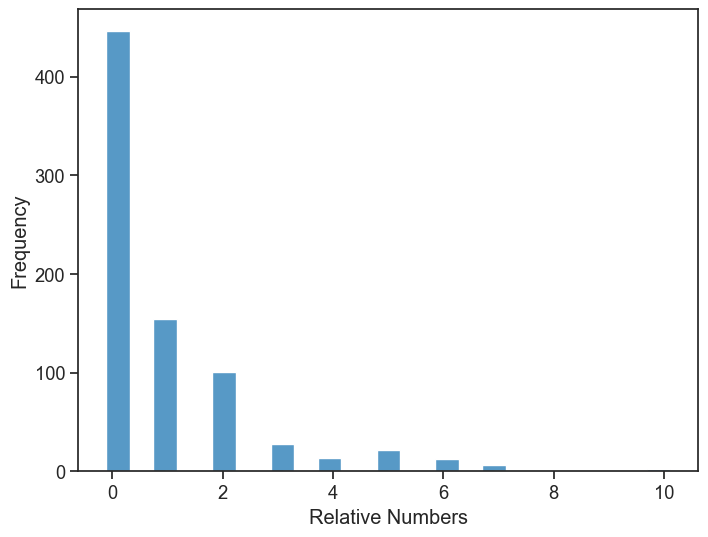

In [160]:
plt.figure(figsize=(8, 6))
sns.histplot(df_undup_mod1['relatives'], shrink=2)
plt.xlabel('Relative Numbers')
plt.ylabel('Frequency')
plt.show()

Використовуючи лямбда функцію заміни кількість родичів, що перевищує число 5(три) на значення "above 5"(понад п'ять):

In [161]:
df_undup_mod2 = df_undup_mod1
df_undup_mod2['relatives'] = df_undup_mod2['relatives'].apply(lambda x: f'{x}' if x < 6 else 'above 5').astype("category")

In [162]:
df_undup_mod2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784 entries, 0 to 783
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   index        784 non-null    int64   
 1   survived     784 non-null    bool    
 2   pclass       784 non-null    int64   
 3   sex          784 non-null    object  
 4   age          678 non-null    float64 
 5   fare         784 non-null    float64 
 6   embarked     782 non-null    object  
 7   class        784 non-null    category
 8   who          784 non-null    object  
 9   adult_male   784 non-null    bool    
 10  deck         202 non-null    category
 11  embark_town  782 non-null    object  
 12  alive        784 non-null    bool    
 13  relatives    784 non-null    category
dtypes: bool(3), category(3), float64(2), int64(2), object(4)
memory usage: 54.5+ KB


Необхідно вивести на екран статистику по модифікованому стовпцю, віднісши нову категорію в кінець( для цього слід перетворити стовпець в категорійний):

In [163]:
df_undup_mod2['relatives'] = df_undup_mod2['relatives'].cat.reorder_categories([str(i) for i in range(6)] + ['above 5'], ordered=True)
df_undup_mod2['relatives'].value_counts().sort_index()

relatives
0          446
1          154
2          101
3           28
4           13
5           22
above 5     20
Name: count, dtype: int64

Заповни відсутні значення віку медіаною.

In [164]:
df_undup_mod3 = df_undup_mod2
df_undup_mod3['age'] = df_undup_mod3['age'].fillna(df_undup_mod3['age'].median())
df_undup_mod3.isna().mean()

index          0.000000
survived       0.000000
pclass         0.000000
sex            0.000000
age            0.000000
fare           0.000000
embarked       0.002551
class          0.000000
who            0.000000
adult_male     0.000000
deck           0.742347
embark_town    0.002551
alive          0.000000
relatives      0.000000
dtype: float64

Створи новий стовпець, де вік представлено категорією, замість числа (наприклад: до 14 років, 14-34 роки, 35-59 років, 60 і більше років). Виконай задачу з використанням користувацької функції. Осіб з невідомим віком познач відповідно.

In [165]:
def age_group(age):
    if age < 14:
        return 'under_14'
    elif 14 <= age <= 24:
        return '14_24'
    elif 25 <= age <= 44:
        return '25_44'
    elif 45 <= age <= 59:
        return '45_59'
    elif age >= 60:
        return '60_plus'
    else:
        return 'unknown'

df_undup_mod3['age'] = df_undup_mod3['age'].astype(int)
df_undup_mod3['age_group'] = df_undup_mod3['age'].apply(age_group).astype('category').cat.reorder_categories(['under_14', '14_24', '25_44', '45_59', '60_plus'], ordered=True)
df_undup_mod3[['age', 'age_group']].head(10)

,age,age_group
0,22,14_24
1,38,25_44
2,26,25_44
3,35,25_44
4,35,25_44
5,28,25_44
6,54,45_59
7,2,under_14
8,27,25_44
9,14,14_24


In [166]:
df_undup_mod3['age_group'].value_counts().sort_index()

age_group
under_14     70
14_24       193
25_44       407
45_59        88
60_plus      26
Name: count, dtype: int64

Перевір, в якій віковій категорії була найвища смертність. Для цього рекомендується перетворити стовпець 'alive' в булевий тип. Потім підрахувати загальну кількість пасажирів та кількість тих, хто не вижив. Потім обчисли відносний показниках для кожної категорії.

In [167]:
death = df_undup_mod3[df_undup_mod3['alive'] == False].groupby('age_group').size()
total = df_undup_mod3.groupby('age_group').size()
mortality_rate = (death / total) * 100
print(f'The rate of mortality by age group:\n {mortality_rate.round(2)}')

The rate of mortality by age group:
 age_group
under_14    41.43
14_24       61.14
25_44       59.46
45_59       60.23
60_plus     73.08
dtype: float64


C:\Users\morov\AppData\Local\Temp\ipykernel_47932\2472350931.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  death = df_undup_mod3[df_undup_mod3['alive'] == False].groupby('age_group').size()
C:\Users\morov\AppData\Local\Temp\ipykernel_47932\2472350931.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total = df_undup_mod3.groupby('age_group').size()


Відтвори cтатистику  смертності у вигляді кругової діаграми з розбивкою по віковим групам. Ти помітив, що відсотки відрізняються? Поясни чому.

**Відповідь:** Відсотки на круговій діаграмі можуть відрізнятися від тих, що були обчислені раніше, оскільки кругова діаграма відображає пропорції кожної вікової групи від загальної кількості смертей, а не від загальної кількості пасажирів у кожній віковій групі. Таким чином, якщо певна вікова група має велику кількість смертей, але також має велику кількість пасажирів, її відсоток на діаграмі може бути меншим порівняно з іншими групами з меншою кількістю смертей, але меншою кількістю пасажирів.

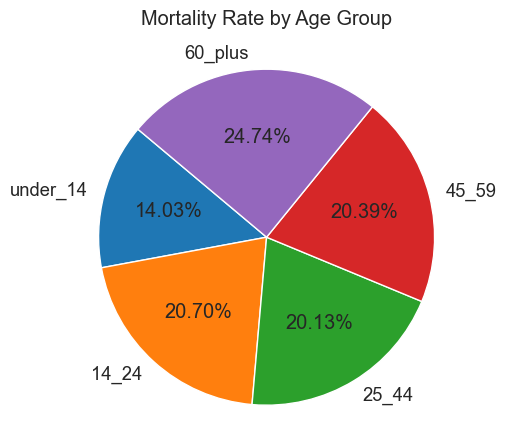

In [168]:
plt.pie(mortality_rate, labels=mortality_rate.index, autopct='%1.2f%%', startangle=140)
plt.title('Mortality Rate by Age Group', pad=20)
plt.axis('equal')
plt.show()

*Бонусне завдання*
Підготуй розгорнуту статистику смертності по категорії віку, класу квитка, рівню каюти та кількості родичів. Які фактори, на твою думку, найбільше пов'язані з рівнем смерності? (наприклад: найбільша смертність у відсотковому значенні спостерігається серед вікової групи ... класу квитка.... при наявності ... родичів та для рівня каюти.... Фактор ... має найвищий вплив на смертність)